In [1]:
!pip -V

pip 20.2.4 from /opt/anaconda3/lib/python3.8/site-packages/pip (python 3.8)


In [2]:
!pip install investpy

In [6]:
import investpy
import pandas
from datetime import datetime

countriesAvailable = investpy.get_certificate_countries()
print(countriesAvailable)

search_result = investpy.search_quotes(text='apple', products=['stocks'],
                                       countries=['united states'], n_results=1)
print(search_result)

default_currency = search_result.retrieve_currency()
print(default_currency)

['france', 'germany', 'italy', 'netherlands', 'sweden']
{"id_": 6408, "name": "Apple Inc", "symbol": "AAPL", "country": "united states", "tag": "/equities/apple-computer-inc", "pair_type": "stocks", "exchange": "NASDAQ"}
USD


In [88]:
import requests
from bs4 import BeautifulSoup as bs

def make_usd_index():
    main_url = "https://kr.investing.com/currencies/us-dollar-index"
    response = requests.get( main_url, headers={"User-agent": "Mozilla/5.0"} )
    soup = bs(response.text, 'html.parser')

    historical_usd_idx = soup.find("div",{"class":"clear overviewDataTable overviewDataTableWithTooltip"})
    idx = 0
    dict_usd_idx = {}
    for row in historical_usd_idx:
        row_string = str(row).strip()
        if len(row_string) == 0: continue
        idx += 1
        temp = str(row_string.split('<span class="float_lang_base_1">')[1:]).replace("['","")
        list_temp = temp.replace("</span><span class=","").split('"float_lang_base_2 bold">')
        dict_usd_idx[idx] = [list_temp[0].replace(" ",""), list_temp[1].replace("</span></div>']","")]
    
    return dict_usd_idx

def make_currency():
    main_url = "https://kr.investing.com/currencies/usd-krw"
    response = requests.get( main_url, headers={"User-agent": "Mozilla/5.0"} )
    soup = bs(response.text, 'html.parser')

    list_usd_krw = soup.find("div",{"class":"main-current-data"})
    idx = 0
    dict_usd_krw = {}
    for row in list_usd_krw:
        row_string = str(row).strip()
        if len(row_string) == 0: continue
        idx += 1
        if idx == 1:
            dict_usd_krw[idx] = row_string.split('<div class="')[1].split(" ")[0]
        else:
            list_val = []
            for val in row_string.split("\n"):
                if "span class" not in val: continue
                list_val.append(val.split('">')[1].replace("</span>",""))
            dict_usd_krw[idx] = list_val
            
    list_usd_krw = soup.find("div",{"class":"clear overviewDataTable overviewDataTableWithTooltip"})
    for row in list_usd_krw:
        row_string = str(row).strip()
        if len(row_string) == 0: continue
        idx += 1
        temp = str(row_string.split('<span class="float_lang_base_1">')[1:]).replace("['","")
        list_temp = temp.replace("</span><span class=","").split('"float_lang_base_2 bold">')
        dict_usd_krw[idx] = [list_temp[0].replace(" ",""), list_temp[1].replace("</span></div>']","")]
    
    return dict_usd_krw
    
dict_usd_idx = make_usd_index()
dict_usd_krw = make_currency()

dict_usd_krw

{1: 'downArrow',
 2: ['1,177.66', '-0.12', '-0.01%'],
 3: ['전일종가', '1,177.78'],
 4: ['매수', '1,177.48'],
 5: ['금일변동', '1,173.91 - 1,181.7'],
 6: ['금일시가', '1,177.7'],
 7: ['매도', '1,177.83'],
 8: ['52주변동폭', '1,080.02 - 1,200.9'],
 9: ['1년변동률', '4.41%']}

In [85]:
# USD Index 52w Average
year_avg_idx = (float(dict_usd_idx[10][1].split(" - ")[0].replace(",","")) + float(dict_usd_idx[10][1].split(" - ")[1].replace(",",""))) / 2
year_avg_idx

91.8675

In [86]:
# Now Index
cur_idx = float(dict_usd_idx[4][1].replace(",",""))
cur_idx

93.738

In [87]:
# USD KRW 52w Average
year_avg_cur = (float(dict_usd_krw[8][1].split(" - ")[0].replace(",","")) + float(dict_usd_krw[8][1].split(" - ")[1].replace(",",""))) / 2
year_avg_cur

1140.46

In [90]:
# Now Currency
now_cur = float(dict_usd_krw[2][0].replace(",",""))
now_cur

1177.66

In [92]:
# Dollar Gap Rate
usd_gap_rate = cur_idx / now_cur * 100
usd_gap_rate

7.959682760728902

In [93]:
# Dollar Gap Rate - 52w
year_avg_usd_gap_rate = year_avg_idx / year_avg_cur * 100
year_avg_usd_gap_rate

8.055302246461954

In [96]:
# Proper USD KRW
proper_cur = round(cur_idx / year_avg_usd_gap_rate * 100, 2)
proper_cur

1163.68

In [102]:
if now_cur < proper_cur * 0.99:
    print("Buy")
elif now_cur > proper_cur * 1.1:
    print("Sell")
else:
    print(now_cur, proper_cur * 0.99, proper_cur * 1.1)
    print("Wait...")

1177.66 1152.0432 1280.0480000000002
Wait...


In [99]:
proper_cur * 0.99

1152.0432

In [103]:
for key, val in dict_usd_idx.items():
    print(key, val)

1 ['전일종가', '93.758']
2 ['만기월', '2021년 12월']
3 ['틱크기', '0.01']
4 ['금일시가', '93.738']
5 ['계약단위', '1,000 x 물가지수']
6 ['틱가치', '10']
7 ['금일변동', '93.523 - 93.782']
8 ['결제방식', '실물인수도']
9 ['티커', 'DX']
10 ['52주변동폭', '89.165 - 94.57']
11 ['결제일', '2021/12/13']
12 ['포인트가치', '1 = $1000']
13 ['1년변동률', '0.89%']
14 ['최종롤오버일', '2021/09/12']
15 ['개월', 'HMUZ']


<AxesSubplot:xlabel='KRW', ylabel='CALC_RT'>

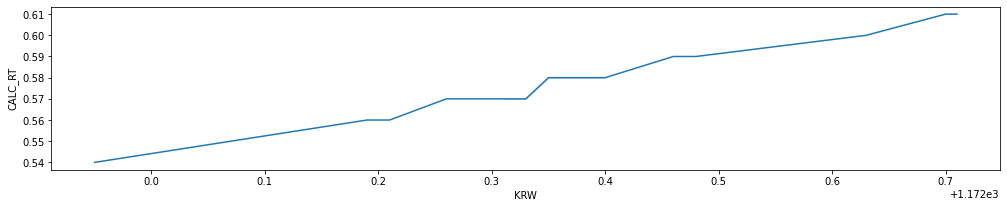

In [13]:
list_curr = [
    [1172.63, 100.6], [1172.4, 100.58], [1172.4, 100.58], [1172.31, 100.57], [1172.48, 100.59],
    [1172.27, 100.57], [1172.35, 100.58], [1172.35, 100.58], [1172.35, 100.58], [1172.33, 100.57],
    [1172.31, 100.57], [1172.31, 100.57], [1172.33, 100.57], [1172.19, 100.56], [1172.21, 100.56],
    [1171.95, 100.54], [1172.26, 100.57], [1172.35, 100.58], [1172.35, 100.58], [1172.46, 100.59],
    [1172.7, 100.61], [1172.71, 100.61]
]

df_curr = pd.DataFrame(list_curr, columns=["KRW","IDX_RT"])

df_curr["CALC_RT"] = df_curr.IDX_RT - 100

plt.figure(figsize=(17, 3))
# sns.barplot(data=df_curr, x="KRW", y="CALC_RT")
sns.lineplot(data=df_curr, x="KRW", y="CALC_RT")

<AxesSubplot:xlabel='KRW', ylabel='CALC_RT'>

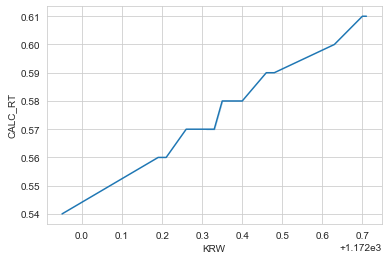

In [15]:
sns.set_style('whitegrid')
sns.lineplot(x='KRW', y='CALC_RT', data=df_curr)

In [2]:
#라이브러리 임포트
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#seaborn에서 제공하는 flights 데이터 셋을 사용
flights = sns.load_dataset('flights')

#그래프 사이즈 설정
plt.figure(figsize=(12, 3))

<Figure size 864x216 with 0 Axes>

<Figure size 864x216 with 0 Axes>

<AxesSubplot:xlabel='year', ylabel='passengers'>

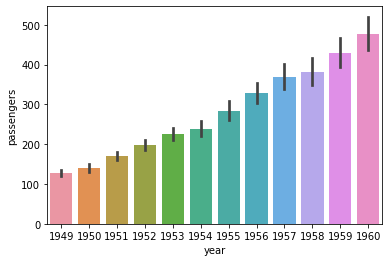

In [3]:
sns.barplot(data=flights, x="year", y="passengers")

In [4]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [16]:
from matplotlib import pyplot as plt

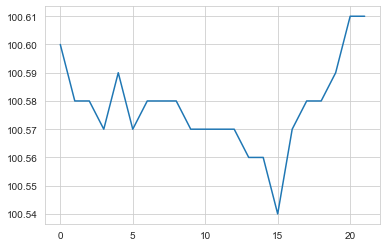

In [20]:
list_curr = [
    [1172.63, 100.6], [1172.4, 100.58], [1172.4, 100.58], [1172.31, 100.57], [1172.48, 100.59],
    [1172.27, 100.57], [1172.35, 100.58], [1172.35, 100.58], [1172.35, 100.58], [1172.33, 100.57],
    [1172.31, 100.57], [1172.31, 100.57], [1172.33, 100.57], [1172.19, 100.56], [1172.21, 100.56],
    [1171.95, 100.54], [1172.26, 100.57], [1172.35, 100.58], [1172.35, 100.58], [1172.46, 100.59],
    [1172.7, 100.61], [1172.71, 100.61]
]

x = []
y = []
for curr in list_curr:
    x.append(float(curr[0]))
    y.append(curr[1])

plt.plot(y)
plt.show()

In [ ]:
import requests
import sys
import time, datetime
from bs4 import BeautifulSoup as bs
from matplotlib import pyplot as plt

sys.path.append("C:/Users/etlers/Documents/project/python/common")

import send_slack_message as SSM
import common_util as CU

plt.ion()       # Enable interactive mode
fig = plt.figure()  # Create figure
axes = fig.add_subplot(111) # Add subplot (dont worry only one plot appears)

axes.set_autoscale_on(True) # enable autoscale
axes.autoscale_view(True,True,True)

l, = plt.plot([], [], 'r-') # Plot blank data
plt.xlabel('x')         # Set up axes
plt.title('test')

list_idx_rt = []
list_krw = []

url_index = "https://kr.investing.com/currencies/us-dollar-index"
url_currency = "https://kr.investing.com/currencies/usd-krw"
line_len = 75

def get_soup(url):
    response = requests.get( url, headers={"User-agent": "Mozilla/5.0"} )
    soup = bs(response.text, 'html.parser')

    return soup


def make_usd_index():
    soup = get_soup(url_index)

    historical_usd_idx = soup.find("div",{"class":"clear overviewDataTable overviewDataTableWithTooltip"})
    idx = 0
    dict_usd_idx = {}
    for row in historical_usd_idx:
        row_string = str(row).strip()
        if len(row_string) == 0: continue
        idx += 1
        temp = str(row_string.split('<span class="float_lang_base_1">')[1:]).replace("['","")
        list_temp = temp.replace("</span><span class=","").split('"float_lang_base_2 bold">')
        dict_usd_idx[idx] = [list_temp[0].replace(" ",""), list_temp[1].replace("</span></div>']","")]
    
    return dict_usd_idx


def make_usd_krw():
    soup = get_soup(url_currency)

    list_usd_krw = soup.find("div",{"class":"main-current-data"})
    idx = 0
    dict_usd_krw = {}
    for row in list_usd_krw:
        row_string = str(row).strip()
        if len(row_string) == 0: continue
        idx += 1
        if idx == 1:
            dict_usd_krw[idx] = row_string.split('<div class="')[1].split(" ")[0]
        else:
            list_val = []
            for val in row_string.split("\n"):
                if "span class" not in val: continue
                list_val.append(val.split('">')[1].replace("</span>",""))
            dict_usd_krw[idx] = list_val
            
    list_usd_krw = soup.find("div",{"class":"clear overviewDataTable overviewDataTableWithTooltip"})
    for row in list_usd_krw:
        row_string = str(row).strip()
        if len(row_string) == 0: continue
        idx += 1
        temp = str(row_string.split('<span class="float_lang_base_1">')[1:]).replace("['","")
        list_temp = temp.replace("</span><span class=","").split('"float_lang_base_2 bold">')
        dict_usd_krw[idx] = [list_temp[0].replace(" ",""), list_temp[1].replace("</span></div>']","")]
    
    return dict_usd_krw


def execute(run_dtm):
    # Make Dictionary Data
    dict_usd_idx = make_usd_index()
    dict_usd_krw = make_usd_krw()
    # USD Index 52w Average
    year_avg_idx = (float(dict_usd_idx[10][1].split(" - ")[0].replace(",","")) + float(dict_usd_idx[10][1].split(" - ")[1].replace(",",""))) / 2
    # Now Index
    cur_idx = float(dict_usd_idx[4][1].replace(",",""))
    # USD KRW 52w Average
    year_avg_cur = (float(dict_usd_krw[8][1].split(" - ")[0].replace(",","")) + float(dict_usd_krw[8][1].split(" - ")[1].replace(",",""))) / 2
    # Now Currency
    now_cur = float(dict_usd_krw[2][0].replace(",",""))
    # Dollar Gap Rate
    usd_gap_rate = cur_idx / now_cur * 100
    # Dollar Gap Rate - 52w
    year_avg_usd_gap_rate = year_avg_idx / year_avg_cur * 100
    # Proper USD KRW
    proper_cur = round(cur_idx / year_avg_usd_gap_rate * 100, 2)
    
    now_rate = round((now_cur / proper_cur) * 100, 2)
    result = f"{proper_cur} - [{now_cur}, {now_rate}%]"
    list_idx_rt.append(now_rate)
    list_krw.append(now_cur)
#     print(result)    



if __name__ == "__main__":

    while True:
        now_dtm = datetime.datetime.now()
        run_dtm = now_dtm.strftime("%Y-%m-%d %H:%M:%S")
        run_hh = now_dtm.strftime("%H")
        
        if run_hh > "17":
            print("End Calculation for Dealing.")
            break

        execute(run_dtm)
        plt.plot(list_idx_rt)
        plt.draw()
        
        l.set_data(list_krw, list_idx_rt) # update data
        axes.relim()        # Recalculate limits
        axes.autoscale_view(True,True,True) #Autoscale
        plt.draw()      # Redraw
        
        time.sleep(1)

NameError: name 'raw_input' is not defined

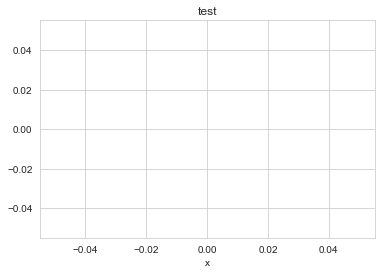

In [27]:
import numpy as np
import matplotlib.pyplot as plt

plt.ion()       # Enable interactive mode
fig = plt.figure()  # Create figure
axes = fig.add_subplot(111) # Add subplot (dont worry only one plot appears)

axes.set_autoscale_on(True) # enable autoscale
axes.autoscale_view(True,True,True)

l, = plt.plot([], [], 'r-') # Plot blank data
plt.xlabel('x')         # Set up axes
plt.title('test')

k = 5
xdata=[0.5 for i in range(k+1)]     # Generate a list to hold data
ydata=[j for j in range(k+1)]

while True:
    y = float(raw_input("y val :")) #Get new data
    xdata.append(y)     # Append new data to list
    k = k + 1       # inc x value
    ydata.append(k)
    l.set_data(ydata,xdata) # update data
#     print xdata     # Print for debug perposes
#     print ydata
    axes.relim()        # Recalculate limits
    axes.autoscale_view(True,True,True) #Autoscale
    plt.draw()      # Redraw